In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


#  **Importing used libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

#  **Data Preparation**

## Loading & Exploring The Dataset

In [3]:
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#
y_train = train_data['label']
x_train = train_data.drop(columns=['label'])

print(y_train.shape)
print(x_train.shape)
print(test_data.shape)

(42000,)
(42000, 784)
(28000, 784)


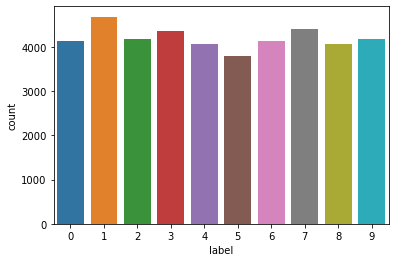

In [5]:
label_distribution = sns.countplot(y_train)

## Data Preprocessing

In [6]:
#Checking for missing values
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
test_data.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [8]:
#Normalizing the data
x_train = x_train/255.0
test_data = test_data/255.0

#Reshaping image to 3D
x_train = x_train.values.reshape(-1,28,28,1)
x_test = test_data.values.reshape(-1,28,28,1)

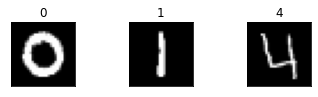

In [9]:
#Examples of the data
for i in range(1,4):
    plt.subplot(3,3,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i][:,:,0],cmap='gray')
    plt.title(y_train[i]);


# **Building The Model**

In [10]:
model=keras.models.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')
    ])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               409856    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [11]:
#Fitting the model
history = model.fit(x_train,y_train,epochs=3,validation_split=0.2)

Epoch 1/3
1050/1050 [==============================] - 20s 19ms/step - loss: 0.2262 - accuracy: 0.9301 - val_loss: 0.0546 - val_accuracy: 0.9829
Epoch 2/3
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0781 - accuracy: 0.9761 - val_loss: 0.0395 - val_accuracy: 0.9874
Epoch 3/3
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0560 - accuracy: 0.9824 - val_loss: 0.0369 - val_accuracy: 0.9885


In [12]:
print("Model's validation accuracy: {:.3f}%".format(history.history['val_accuracy'][2]*100))

Model's validation accuracy: 98.845%


In [13]:
#Obtaining the model's predictions
predictions = model.predict([x_test])
y_pred = np.argmax(predictions,axis = 1) 

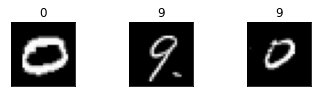

In [14]:
#Visualizing the model's predictions
for i in range(1,4):
    plt.subplot(3,3,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i][:,:,0],cmap='gray')
    plt.title(y_pred[i]);

In [15]:
#Geberate submission df
submissions=pd.DataFrame({"ImageId": list(range(1,len(y_pred)+1)), "Label": y_pred})

# Generate csv file
submissions.to_csv("submission.csv", index=False, header=True)